In [ ]:
import os
import numpy as np
import pandas as pd 
import random
import cv2
import matplotlib.pyplot as plt

seed = 2019
np.random.seed(seed)
%matplotlib inline


path  = '/content/drive/MyDrive/yeni_oct_normal_cnv/'
train = path + 'train/'
test  = path + 'test/'
path,train,test


from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(zoom_range = 0.3,
                                   horizontal_flip = True
                                   )
test_datagen = ImageDataGenerator()

train_gen = train_datagen.flow_from_directory(
                            directory = train, 
                            target_size = (160, 160), 
                            batch_size = 8, 
                            class_mode = 'categorical', 
                            shuffle=True)

test_gen = train_datagen.flow_from_directory(
                            directory = test, 
                            target_size = (160, 160), 
                            batch_size = 8, 
                            class_mode = 'categorical', 
                            shuffle=True)

Found 6943 images belonging to 2 classes.
Found 1092 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization
from keras.optimizers import SGD
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler

model = Sequential([

Conv2D(16, (3, 3), activation='relu', input_shape=(160, 160, 3)),
MaxPool2D((2, 2)),
    
Conv2D(32, (3, 3), activation='relu'),
BatchNormalization(),
MaxPool2D(pool_size=(2, 2)),

Conv2D(64, (3, 3), activation='relu'),
BatchNormalization(),
MaxPool2D(pool_size=(2, 2)),

Conv2D(128, (3, 3), activation='relu'),
BatchNormalization(),
MaxPool2D(pool_size=(2, 2)),
Dropout(rate=0.2),
    
Conv2D(256, (3, 3), activation='relu'),
BatchNormalization(),
MaxPool2D(pool_size=(2, 2)),
Dropout(rate=0.2),

Flatten(),
Dense(units=1024, activation='relu'),
Dropout(rate=0.3),

Dense(units=2, activation='softmax') ])
opt = SGD(lr=0.0001, momentum=0.9)
model.compile(loss='mean_squared_error', optimizer=opt, metrics= ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 158, 158, 16)      448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 79, 79, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 77, 77, 32)        4640      
_________________________________________________________________
batch_normalization_4 (Batch (None, 77, 77, 32)        128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 38, 38, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 36, 36, 64)        18496     
_________________________________________________________________
batch_normalization_5 (Batch (None, 36, 36, 64)       

In [ ]:
history=  model.fit(
           train_gen, 
           validation_data=test_gen,
           batch_size=8,
           epochs=30)
model.save("/content/drive/MyDrive/yapay_zeka_calisma/normal_cnv_cnn_lr.h5")

Epoch 1/30
868/868 [==============================] - 1127s 1s/step - loss: 0.1660 - accuracy: 0.7860 - val_loss: 0.0204 - val_accuracy: 0.9789
Epoch 2/30
868/868 [==============================] - 281s 323ms/step - loss: 0.1101 - accuracy: 0.8574 - val_loss: 0.0046 - val_accuracy: 0.9945
Epoch 3/30
868/868 [==============================] - 282s 325ms/step - loss: 0.0887 - accuracy: 0.8864 - val_loss: 0.0221 - val_accuracy: 0.9716
Epoch 4/30
868/868 [==============================] - 281s 324ms/step - loss: 0.0717 - accuracy: 0.9095 - val_loss: 0.0047 - val_accuracy: 0.9945
Epoch 5/30
868/868 [==============================] - 280s 323ms/step - loss: 0.0647 - accuracy: 0.9172 - val_loss: 0.0100 - val_accuracy: 0.9853
Epoch 6/30
868/868 [==============================] - 283s 326ms/step - loss: 0.0592 - accuracy: 0.9242 - val_loss: 0.0032 - val_accuracy: 0.9973
Epoch 7/30
868/868 [==============================] - 281s 323ms/step - loss: 0.0529 - accuracy: 0.9362 - val_loss: 0.0130 - v

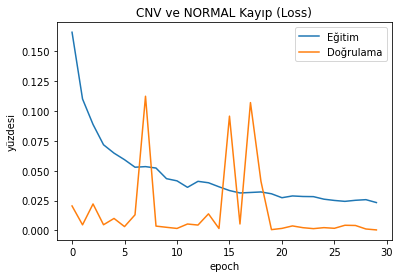

In [ ]:
history1=history
plt.figure()
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.legend(['Eğitim','Doğrulama'])
plt.title('CNV ve NORMAL Kayıp (Loss)')
plt.xlabel('epoch')
plt.ylabel('yüzdesi')
plt.savefig('/content/drive/MyDrive/yapay_zeka_calisma/cnv_normal_kayip_lr.png')

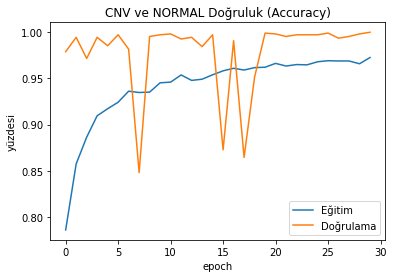

In [ ]:
plt.figure()
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.legend(['Eğitim','Doğrulama'])
plt.title('CNV ve NORMAL Doğruluk (Accuracy)')
plt.savefig('/content/drive/MyDrive/yapay_zeka_calisma/cnv_normal_basari.png')
plt.xlabel('epoch')
plt.ylabel('yüzdesi')
plt.show()

In [ ]:
dosya=os.listdir(train)
import glob
test_data = []
test_labels = []

for name in dosya:
    for img in os.listdir(test + name + '/'):
        img = plt.imread(test + name + '/' + img)
        img = cv2.resize(img, (160, 160))
        img = np.dstack([img, img, img])
        img = img.astype('float32')
        
        if   name =='CNV':
            label = 0
        elif name =='NORMAL':
            label = 1
            
        test_data.append(img)
        test_labels.append(label)
        
x_test = np.array(test_data)
y_test = np.array(test_labels)
y_pred_clas = model.predict_classes(x_test)# np.argmax(model.predict(x), axis=-1)
y_pred= model.predict(x_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_clas)
cm2=pd.DataFrame(cm, columns=['CNV','NORMAL'],index=['CNV','NORMAL'])
cm2

,CNV,NORMAL
CNV,852,6
NORMAL,0,234


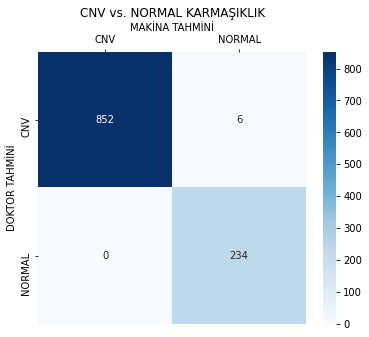

In [ ]:
cm = confusion_matrix(y_test, y_pred_clas)

plt.figure(figsize = (6,5))

plt.title('CNV vs. NORMAL KARMAŞIKLIK')
hm=sns.heatmap(cm2, annot=True, fmt='n',cmap='Blues')
hm.tick_params(labeltop=True, labelbottom=False, top=True, bottom= False)
hm.set_xlabel('MAKİNA TAHMİNİ')
hm.xaxis.set_label_position('top')
hm.set_ylabel('DOKTOR TAHMİNİ')
plt.savefig('/content/drive/MyDrive/yapay_zeka_calisma/cnv_normal_karmasiklik_lr_yeni.png')
plt.show()

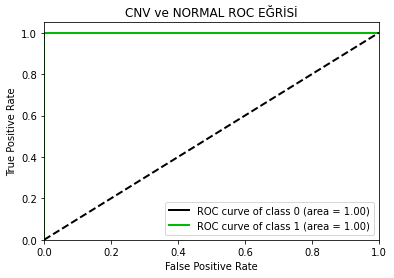

In [ ]:
!pip install scikit-plot
import scikitplot as skplt
import matplotlib.pyplot as plt

skplt.metrics.plot_roc(y_test,
                       y_pred,
                       plot_micro=False,
                       plot_macro=False)
plt.title('CNV ve NORMAL ROC EĞRİSİ')
plt.savefig('/content/drive/MyDrive/yapay_zeka_calisma/cnv_normal_roc_lr.png')
plt.show()

In [ ]:
occluding_size = 70
occluding_stride =  10

image = cv2.imread('/content/drive/MyDrive/oct_dme_normal/train/NORMAL/NORMAL-100580-2.jpeg')
im = cv2.resize(image, (160, 160))
im2 = im.astype(np.float32)
im3 = np.expand_dims(im2, axis=0)
out = model.predict(im3)
out = out[0]
m = max(out)
index_object = [i for i, j in enumerate(out) if j == m]
height, width, _ = image.shape
output_height = int((height-occluding_size) / occluding_stride + 1)
output_width = int((width-occluding_size) / occluding_stride + 1)
heatmap = np.zeros((output_height, output_width))
heatmap.shape

(45, 45)

In [ ]:
import copy
from tqdm.notebook import tqdm

a = []

for h in tqdm(range(output_height)):
        #print('scanning position (%s)'%(h))
        for w in range(output_width):
            h_start = h * occluding_stride
            w_start = w * occluding_stride
            h_end = min(height, h_start + occluding_size)
            w_end = min(width, w_start + occluding_size)
            input_image = copy.copy(image)
            input_image[h_start:h_end, w_start:w_end,:] = 0
            a.append(input_image)
            im = cv2.resize(input_image, (160, 160))
            im = im.astype(np.float32)
            im = np.expand_dims(im, axis=0)
            out = model.predict(im)
            out = out[0]
            prob = (out[index_object]) 
            heatmap[h,w] = prob

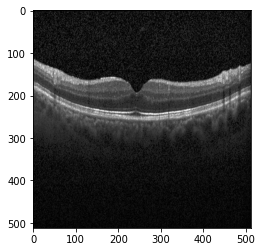

In [ ]:
plt.imshow(heatmap,cmap='hot')
import copy
input_image2 = copy.copy(image)
plt.imshow(input_image2)

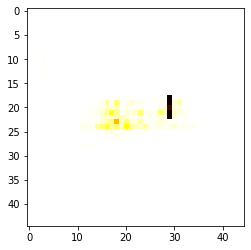

In [ ]:
plt.imshow(heatmap,cmap='hot')
plt.savefig('/content/drive/MyDrive/yapay_zeka_calisma/cnv_normal_hot_lr.png')

In [ ]:
#DME VE NORMAL İÇİN 

In [ ]:
import os
import numpy as np
import pandas as pd 
import random
import cv2
import matplotlib.pyplot as plt

seed = 2019
np.random.seed(seed)
%matplotlib inline


path  = '/content/drive/MyDrive/oct_dme_normal/'
train = path + 'train/'
test  = path + 'test/'
path,train,test


from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(zoom_range = 0.3,
                                   horizontal_flip = True
                                   )
test_datagen = ImageDataGenerator()

train_gen = train_datagen.flow_from_directory(
                            directory = train, 
                            target_size = (160, 160), 
                            batch_size = 8, 
                            class_mode = 'categorical', 
                            shuffle=True)

test_gen = train_datagen.flow_from_directory(
                            directory = test, 
                            target_size = (160, 160), 
                            batch_size = 8, 
                            class_mode = 'categorical', 
                            shuffle=True)

Found 4831 images belonging to 2 classes.
Found 468 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization
from keras.optimizers import SGD
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler

model1 = Sequential([

Conv2D(16, (3, 3), activation='relu', input_shape=(160, 160, 3)),
MaxPool2D((2, 2)),
    
Conv2D(32, (3, 3), activation='relu'),
BatchNormalization(),
MaxPool2D(pool_size=(2, 2)),

Conv2D(64, (3, 3), activation='relu'),
BatchNormalization(),
MaxPool2D(pool_size=(2, 2)),

Conv2D(128, (3, 3), activation='relu'),
BatchNormalization(),
MaxPool2D(pool_size=(2, 2)),
Dropout(rate=0.2),
    
Conv2D(256, (3, 3), activation='relu'),
BatchNormalization(),
MaxPool2D(pool_size=(2, 2)),
Dropout(rate=0.2),

Flatten(),
Dense(units=1024, activation='relu'),
Dropout(rate=0.3),

Dense(units=2, activation='softmax') ])
opt = SGD(lr=0.0001, momentum=0.9)
model1.compile(loss='mean_squared_error', optimizer=opt, metrics= ['accuracy'])

In [ ]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 158, 158, 16)      448       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 79, 79, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 77, 77, 32)        4640      
_________________________________________________________________
batch_normalization_8 (Batch (None, 77, 77, 32)        128       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 38, 38, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 36, 36, 64)        18496     
_________________________________________________________________
batch_normalization_9 (Batch (None, 36, 36, 64)       

In [ ]:
#DME VE NORMAL İÇİN

In [ ]:
import os
import numpy as np
import pandas as pd 
import random
import cv2
import matplotlib.pyplot as plt

seed = 2019
np.random.seed(seed)
%matplotlib inline


path  = '/content/drive/MyDrive/oct_dme_normal/'
train = path + 'train/'
test  = path + 'test/'
path,train,test


from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(zoom_range = 0.3,
                                   horizontal_flip = True
                                   )
test_datagen = ImageDataGenerator()

train_gen = train_datagen.flow_from_directory(
                            directory = train, 
                            target_size = (160, 160), 
                            batch_size = 8, 
                            class_mode = 'categorical', 
                            shuffle=True)

test_gen = train_datagen.flow_from_directory(
                            directory = test, 
                            target_size = (160, 160), 
                            batch_size = 8, 
                            class_mode = 'categorical', 
                            shuffle=True)

Found 4831 images belonging to 2 classes.
Found 468 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization
from keras.optimizers import SGD
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler

model1 = Sequential([

Conv2D(16, (3, 3), activation='relu', input_shape=(160, 160, 3)),
MaxPool2D((2, 2)),
    
Conv2D(32, (3, 3), activation='relu'),
BatchNormalization(),
MaxPool2D(pool_size=(2, 2)),

Conv2D(64, (3, 3), activation='relu'),
BatchNormalization(),
MaxPool2D(pool_size=(2, 2)),

Conv2D(128, (3, 3), activation='relu'),
BatchNormalization(),
MaxPool2D(pool_size=(2, 2)),
Dropout(rate=0.2),
    
Conv2D(256, (3, 3), activation='relu'),
BatchNormalization(),
MaxPool2D(pool_size=(2, 2)),
Dropout(rate=0.2),

Flatten(),
Dense(units=1024, activation='relu'),
Dropout(rate=0.3),

Dense(units=2, activation='softmax') ])
opt = SGD(lr=0.0001, momentum=0.9)
model1.compile(loss='mean_squared_error', optimizer=opt, metrics= ['accuracy'])

In [ ]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 158, 158, 16)      448       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 79, 79, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 77, 77, 32)        4640      
_________________________________________________________________
batch_normalization_8 (Batch (None, 77, 77, 32)        128       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 38, 38, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 36, 36, 64)        18496     
_________________________________________________________________
batch_normalization_9 (Batch (None, 36, 36, 64)       

In [ ]:
history1=  model1.fit(
           train_gen, 
           validation_data=test_gen,
           batch_size=8,
           epochs=20)
model1.save("/content/drive/MyDrive/yapay_zeka_calisma/normal_dme_cnn_lr.h5")

Epoch 1/20
604/604 [==============================] - 180s 297ms/step - loss: 0.3290 - accuracy: 0.5677 - val_loss: 0.2144 - val_accuracy: 0.6752
Epoch 2/20
604/604 [==============================] - 180s 298ms/step - loss: 0.2719 - accuracy: 0.6467 - val_loss: 0.2783 - val_accuracy: 0.6325
Epoch 3/20
604/604 [==============================] - 180s 298ms/step - loss: 0.2290 - accuracy: 0.6965 - val_loss: 0.1329 - val_accuracy: 0.8333
Epoch 4/20
604/604 [==============================] - 177s 292ms/step - loss: 0.1898 - accuracy: 0.7502 - val_loss: 0.1707 - val_accuracy: 0.7714
Epoch 5/20
604/604 [==============================] - 178s 294ms/step - loss: 0.1765 - accuracy: 0.7664 - val_loss: 0.0844 - val_accuracy: 0.8932
Epoch 6/20
604/604 [==============================] - 181s 299ms/step - loss: 0.1665 - accuracy: 0.7853 - val_loss: 0.0783 - val_accuracy: 0.8953
Epoch 7/20
604/604 [==============================] - 181s 300ms/step - loss: 0.1522 - accuracy: 0.8063 - val_loss: 0.0965 -

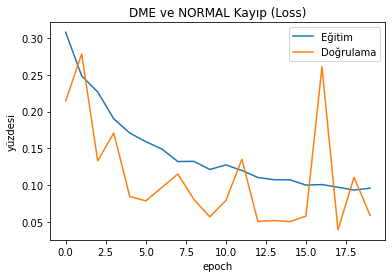

In [ ]:
history2=history1
plt.figure()
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.legend(['Eğitim','Doğrulama'])
plt.title('DME ve NORMAL Kayıp (Loss)')
plt.xlabel('epoch')
plt.ylabel('yüzdesi')
plt.savefig('/content/drive/MyDrive/yapay_zeka_calisma/dme_normal_kayip_lr.png')

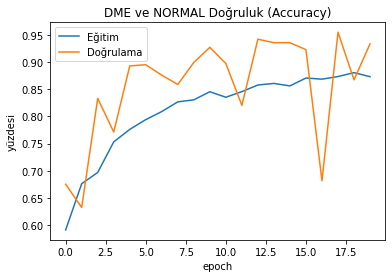

In [ ]:
plt.figure()
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.legend(['Eğitim','Doğrulama'])
plt.title('DME ve NORMAL Doğruluk (Accuracy)')
plt.savefig('/content/drive/MyDrive/yapay_zeka_calisma/dme_normal_basari_lr.png')
plt.xlabel('epoch')
plt.ylabel('yüzdesi')
plt.show()

In [ ]:
dosya=os.listdir(train)
import glob
test_data = []
test_labels = []

for name in dosya:
    for img in os.listdir(test + name + '/'):
        img = plt.imread(test + name + '/' + img)
        img = cv2.resize(img, (160, 160))
        img = np.dstack([img, img, img])
        img = img.astype('float32')
        
        if   name =='DME':
            label = 0
        elif name =='NORMAL':
            label = 1
            
        test_data.append(img)
        test_labels.append(label)
        
x_test = np.array(test_data)
y_test = np.array(test_labels)
y_pred_clas = model1.predict_classes(x_test)# np.argmax(model.predict(x), axis=-1)
y_pred= model1.predict(x_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_clas)
cm2=pd.DataFrame(cm, columns=['DME','NORMAL'],index=['DME','NORMAL'])
cm2

,DME,NORMAL
DME,188,46
NORMAL,0,234


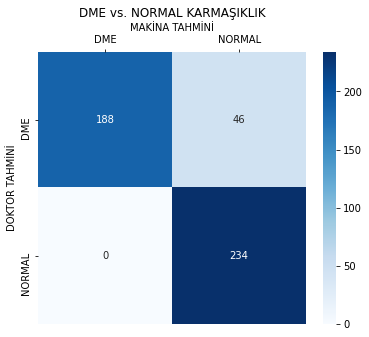

In [ ]:
cm = confusion_matrix(y_test, y_pred_clas)

plt.figure(figsize = (6,5))

plt.title('DME vs. NORMAL KARMAŞIKLIK')
hm=sns.heatmap(cm2, annot=True, fmt='n',cmap='Blues')
hm.tick_params(labeltop=True, labelbottom=False, top=True, bottom= False)
hm.set_xlabel('MAKİNA TAHMİNİ')
hm.xaxis.set_label_position('top')
hm.set_ylabel('DOKTOR TAHMİNİ')
plt.savefig('/content/drive/MyDrive/yapay_zeka_calisma/dme_normal_karmasiklik_lr.png')
plt.show()

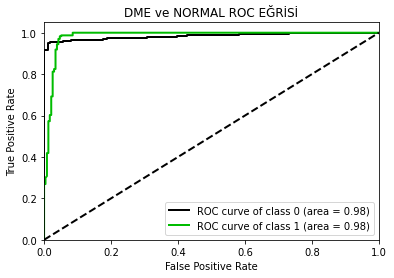

In [ ]:
!pip install scikit-plot
import scikitplot as skplt
import matplotlib.pyplot as plt

skplt.metrics.plot_roc(y_test,
                       y_pred,
                       plot_micro=False,
                       plot_macro=False)
plt.title('DME ve NORMAL ROC EĞRİSİ')
plt.savefig('/content/drive/MyDrive/yapay_zeka_calisma/dme_normal_roc_lr_yeni.png')
plt.show()

In [ ]:
occluding_size = 70
occluding_stride =  10

image = cv2.imread('/content/drive/MyDrive/oct_dme_normal/train/DME/DME-258763-31.jpeg')
im = cv2.resize(image, (160, 160))
im2 = im.astype(np.float32)
im3 = np.expand_dims(im2, axis=0)
out = model1.predict(im3)
out = out[0]
m = max(out)
index_object = [i for i, j in enumerate(out) if j == m]
height, width, _ = image.shape
output_height = int((height-occluding_size) / occluding_stride + 1)
output_width = int((width-occluding_size) / occluding_stride + 1)
heatmap = np.zeros((output_height, output_width))
heatmap.shape

(43, 45)

In [ ]:
import copy
from tqdm.notebook import tqdm

a = []

for h in tqdm(range(output_height)):
        #print('scanning position (%s)'%(h))
        for w in range(output_width):
            h_start = h * occluding_stride
            w_start = w * occluding_stride
            h_end = min(height, h_start + occluding_size)
            w_end = min(width, w_start + occluding_size)
            input_image = copy.copy(image)
            input_image[h_start:h_end, w_start:w_end,:] = 0
            a.append(input_image)
            im = cv2.resize(input_image, (160, 160))
            im = im.astype(np.float32)
            im = np.expand_dims(im, axis=0)
            out = model1.predict(im)
            out = out[0]
            prob = (out[index_object]) 
            heatmap[h,w] = prob

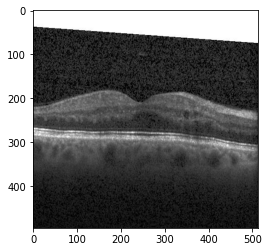

In [ ]:
plt.imshow(heatmap,cmap='hot')
import copy
input_image2 = copy.copy(image)
plt.imshow(input_image2)

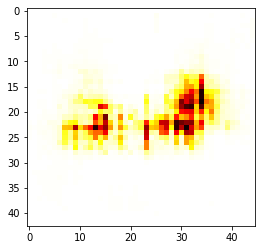

In [ ]:
plt.imshow(heatmap,cmap='hot')
plt.savefig('/content/drive/MyDrive/yapay_zeka_calisma/dme_normal_hot_lr.png')

In [ ]:
#DRUSEN VE NORMAL

In [ ]:
import os
import numpy as np
import pandas as pd 
import random
import cv2
import matplotlib.pyplot as plt

seed = 2019
np.random.seed(seed)
%matplotlib inline

In [ ]:
path  = '/content/drive/MyDrive/oct_drusen_normal/'
train = path + 'train/'
test  = path + 'test/'

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(zoom_range = 0.3,
                                   horizontal_flip = True
                                   )
test_datagen = ImageDataGenerator()

In [ ]:
train_gen = train_datagen.flow_from_directory(
                            directory = train, 
                            target_size = (160, 160), 
                            batch_size = 8, 
                            class_mode = 'categorical', 
                            shuffle=True)

test_gen = train_datagen.flow_from_directory(
                            directory = test, 
                            target_size = (160, 160), 
                            batch_size = 8, 
                            class_mode = 'categorical', 
                            shuffle=True)

Found 3405 images belonging to 2 classes.
Found 468 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization
from keras.optimizers import SGD
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler

model3 = Sequential([

Conv2D(16, (3, 3), activation='relu', input_shape=(160, 160, 3)),
MaxPool2D((2, 2)),
    
Conv2D(32, (3, 3), activation='relu'),
BatchNormalization(),
MaxPool2D(pool_size=(2, 2)),

Conv2D(64, (3, 3), activation='relu'),
BatchNormalization(),
MaxPool2D(pool_size=(2, 2)),

Conv2D(128, (3, 3), activation='relu'),
BatchNormalization(),
MaxPool2D(pool_size=(2, 2)),
Dropout(rate=0.2),
    
Conv2D(256, (3, 3), activation='relu'),
BatchNormalization(),
MaxPool2D(pool_size=(2, 2)),
Dropout(rate=0.2),

Flatten(),
Dense(units=1024, activation='relu'),
Dropout(rate=0.3),

Dense(units=2, activation='softmax') ])
opt = SGD(lr=0.001, momentum=0.9)
model3.compile(loss='mean_squared_error', optimizer=opt, metrics= ['accuracy'])

In [ ]:
model3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 158, 158, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 79, 79, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 77, 77, 32)        4640      
_________________________________________________________________
batch_normalization (BatchNo (None, 77, 77, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 38, 38, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 36, 36, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 36, 36, 64)        2

In [ ]:
history=  model3.fit(
           train_gen, 
           validation_data=test_gen,
           batch_size=8,
           epochs=30)
model3.save("/content/drive/MyDrive/yapay_zeka_calisma/drusen_cnv_cnn_lr.h5")

Epoch 1/30
426/426 [==============================] - 872s 2s/step - loss: 0.3863 - accuracy: 0.5430 - val_loss: 0.2629 - val_accuracy: 0.6966
Epoch 2/30
426/426 [==============================] - 32s 76ms/step - loss: 0.3527 - accuracy: 0.5971 - val_loss: 0.2158 - val_accuracy: 0.7436
Epoch 3/30
426/426 [==============================] - 32s 76ms/step - loss: 0.2501 - accuracy: 0.6985 - val_loss: 0.1443 - val_accuracy: 0.8120
Epoch 4/30
426/426 [==============================] - 32s 76ms/step - loss: 0.2240 - accuracy: 0.7204 - val_loss: 0.2516 - val_accuracy: 0.6923
Epoch 5/30
426/426 [==============================] - 32s 76ms/step - loss: 0.1939 - accuracy: 0.7637 - val_loss: 0.2885 - val_accuracy: 0.6709
Epoch 6/30
426/426 [==============================] - 32s 76ms/step - loss: 0.1730 - accuracy: 0.7814 - val_loss: 0.1169 - val_accuracy: 0.8547
Epoch 7/30
426/426 [==============================] - 32s 75ms/step - loss: 0.1721 - accuracy: 0.7827 - val_loss: 0.4113 - val_accuracy: 

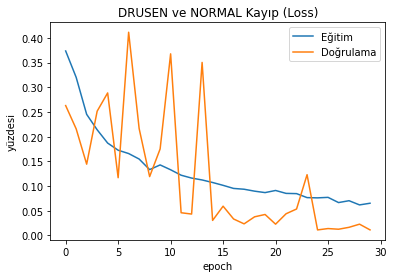

In [ ]:
history5=history

plt.figure()
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.legend(['Eğitim','Doğrulama'])
plt.title('DRUSEN ve NORMAL Kayıp (Loss)')
plt.xlabel('epoch')
plt.ylabel('yüzdesi')
plt.savefig('/content/drive/MyDrive/yapay_zeka_calisma/drusen_normal_kayip_lr.png')

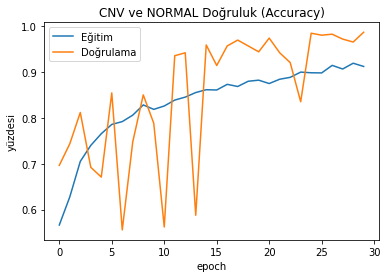

In [ ]:
plt.figure()
plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.legend(['Eğitim','Doğrulama'])
plt.title('CNV ve NORMAL Doğruluk (Accuracy)')
plt.savefig('/content/drive/MyDrive/yapay_zeka_calisma/drusen_normal_basari.png')
plt.xlabel('epoch')
plt.ylabel('yüzdesi')
plt.show()

In [ ]:
dosya=os.listdir(train)
import glob
test_data = []
test_labels = []

for name in dosya:
    for img in os.listdir(test + name + '/'):
        img = plt.imread(test + name + '/' + img)
        img = cv2.resize(img, (160, 160))
        img = np.dstack([img, img, img])
        img = img.astype('float32')
        
        if   name =='DRUSEN':
            label = 0
        elif name =='NORMAL':
            label = 1
            
        test_data.append(img)
        test_labels.append(label)
        
x_test = np.array(test_data)
y_test = np.array(test_labels)
y_pred_clas = model3.predict_classes(x_test)# np.argmax(model.predict(x), axis=-1)
y_pred= model3.predict(x_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_clas)
cm2=pd.DataFrame(cm, columns=['DRUSEN','NORMAL'],index=['DRUSEN','NORMAL'])
cm2

,DRUSEN,NORMAL
DRUSEN,227,7
NORMAL,0,234


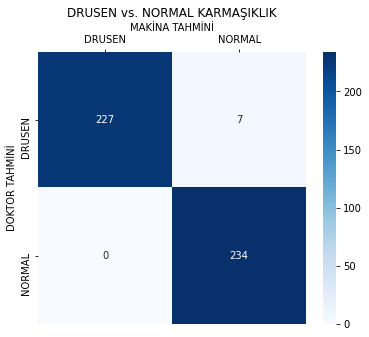

In [ ]:
cm = confusion_matrix(y_test, y_pred_clas)

plt.figure(figsize = (6,5))

plt.title('DRUSEN vs. NORMAL KARMAŞIKLIK')
hm=sns.heatmap(cm2, annot=True, fmt='n',cmap='Blues')
hm.tick_params(labeltop=True, labelbottom=False, top=True, bottom= False)
hm.set_xlabel('MAKİNA TAHMİNİ')
hm.xaxis.set_label_position('top')
hm.set_ylabel('DOKTOR TAHMİNİ')
plt.savefig('/content/drive/MyDrive/yapay_zeka_calisma/drusen_normal_karmasiklik_lr.png')
plt.show()

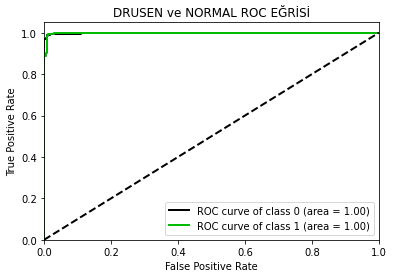

In [ ]:
!pip install scikit-plot
import scikitplot as skplt
import matplotlib.pyplot as plt

skplt.metrics.plot_roc(y_test,
                       y_pred,
                       plot_micro=False,
                       plot_macro=False)
plt.title('DRUSEN ve NORMAL ROC EĞRİSİ')
plt.savefig('/content/drive/MyDrive/yapay_zeka_calisma/drusen_normal_roc_lr_yeni.png')
plt.show()

In [ ]:
occluding_size = 70
occluding_stride =  10

image = cv2.imread('/content/drive/MyDrive/oct_drusen_normal/train/DRUSEN/DRUSEN-1071961-7.jpeg')
im = cv2.resize(image, (160, 160))
im2 = im.astype(np.float32)
im3 = np.expand_dims(im2, axis=0)
out = model3.predict(im3)
out = out[0]
m = max(out)
index_object = [i for i, j in enumerate(out) if j == m]
height, width, _ = image.shape
output_height = int((height-occluding_size) / occluding_stride + 1)
output_width = int((width-occluding_size) / occluding_stride + 1)
heatmap = np.zeros((output_height, output_width))
heatmap.shape

(43, 45)

In [ ]:
import copy
from tqdm.notebook import tqdm

a = []

for h in tqdm(range(output_height)):
        #print('scanning position (%s)'%(h))
        for w in range(output_width):
            h_start = h * occluding_stride
            w_start = w * occluding_stride
            h_end = min(height, h_start + occluding_size)
            w_end = min(width, w_start + occluding_size)
            input_image = copy.copy(image)
            input_image[h_start:h_end, w_start:w_end,:] = 0
            a.append(input_image)
            im = cv2.resize(input_image, (160, 160))
            im = im.astype(np.float32)
            im = np.expand_dims(im, axis=0)
            out = model3.predict(im)
            out = out[0]
            prob = (out[index_object]) 
            heatmap[h,w] = prob

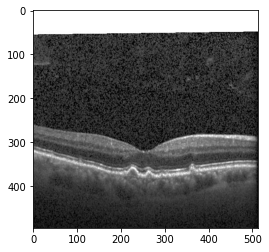

In [ ]:
plt.imshow(heatmap,cmap='hot')
import copy
input_image2 = copy.copy(image)
plt.imshow(input_image2)

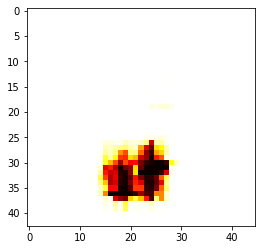

In [ ]:
plt.imshow(heatmap,cmap='hot')
plt.savefig('/content/drive/MyDrive/yapay_zeka_calisma/drusen_normal_hot_lr.png')

In [ ]:
#4'LÜ SINIFLANDIRMA EFFCİNET5

In [ ]:
import os
import numpy as np
import pandas as pd 
import random
import cv2
import matplotlib.pyplot as plt

seed = 2019
np.random.seed(seed)
%matplotlib inline

In [ ]:
path  = '/content/drive/MyDrive/veriseti/'
train = path + 'train/'
test  = path + 'test/'

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(zoom_range = 0.3,
                                   horizontal_flip = True
                                   )
test_datagen = ImageDataGenerator()

In [ ]:
train_gen = train_datagen.flow_from_directory(
                            directory = train, 
                            target_size = (160, 160), 
                            batch_size = 16, 
                            class_mode = 'categorical', 
                            shuffle=True)

test_gen = train_datagen.flow_from_directory(
                            directory = test, 
                            target_size = (160, 160), 
                            batch_size = 16, 
                            class_mode = 'categorical', 
                            shuffle=True)

In [ ]:
train_gen[0][0][0].shape

(160, 160, 3)

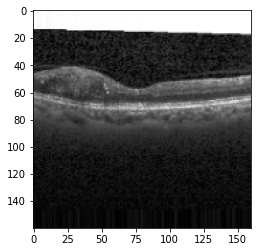

In [ ]:
plt.imshow(train_gen[0][0][15]/255)

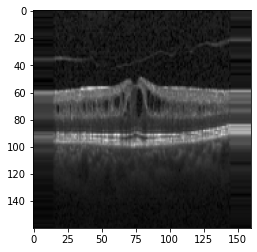

In [ ]:
plt.imshow(train_gen[0][0][12]/255)

In [ ]:
pip install efficientnet

In [ ]:
from efficientnet.keras import EfficientNetB5
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers


model = Sequential()
model.add(EfficientNetB5(weights='imagenet',include_top=False, input_shape=(160,160,3)))
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4,activation = 'softmax'))
    
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics= ['accuracy'])

In [ ]:
history_eff = model.fit(
           train_gen, steps_per_epoch=train_gen.samples/16, 
           epochs=20,        
           validation_data=test_gen, 
           validation_steps=test_gen.samples // 16,
           verbose=1)

model.save("/content/drive/MyDrive/eff.h5")

Epoch 1/20
250/250 [==============================] - 87s 347ms/step - loss: 0.5297 - accuracy: 0.8218 - val_loss: 0.2026 - val_accuracy: 0.9494
Epoch 2/20
250/250 [==============================] - 84s 336ms/step - loss: 0.2867 - accuracy: 0.9158 - val_loss: 0.2142 - val_accuracy: 0.9246
Epoch 3/20
250/250 [==============================] - 84s 336ms/step - loss: 0.2295 - accuracy: 0.9273 - val_loss: 0.1148 - val_accuracy: 0.9591
Epoch 4/20
250/250 [==============================] - 84s 337ms/step - loss: 0.2132 - accuracy: 0.9335 - val_loss: 0.1151 - val_accuracy: 0.9601
Epoch 5/20
250/250 [==============================] - 84s 337ms/step - loss: 0.2056 - accuracy: 0.9400 - val_loss: 0.0844 - val_accuracy: 0.9688
Epoch 6/20
250/250 [==============================] - 84s 336ms/step - loss: 0.1679 - accuracy: 0.9468 - val_loss: 0.2910 - val_accuracy: 0.9289
Epoch 7/20
250/250 [==============================] - 84s 335ms/step - loss: 0.1561 - accuracy: 0.9510 - val_loss: 0.0700 - val_ac

Text(0.5, 0, 'epoch')

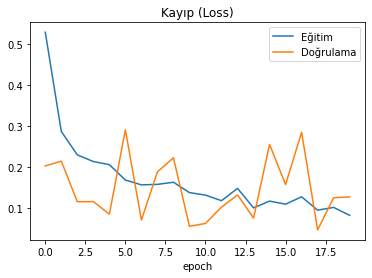

In [ ]:
history = history_eff
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Eğitim','Doğrulama'])
plt.title('Kayıp (Loss)')
plt.xlabel('epoch')

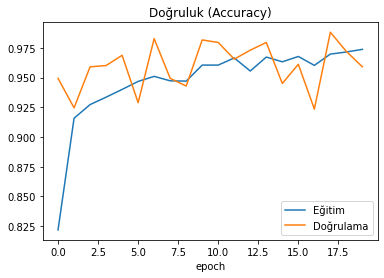

In [ ]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Eğitim','Doğrulama'])
plt.title('Doğruluk (Accuracy)')
plt.xlabel('epoch')
plt.show()

In [ ]:
dosya=os.listdir(train)

In [ ]:
dosya=os.listdir(train)
import glob
test_data = []
test_labels = []

for name in dosya:
    for img in os.listdir(test + name + '/'):
        img = plt.imread(test + name + '/' + img)
        img = cv2.resize(img, (160, 160))
        img = np.dstack([img, img, img])
        img = img.astype('float32')
        
        if   name =='CNV':
            label = 0
        elif name =='DME':
            label = 1
        elif name =='DRUSEN':
            label = 2
        elif name =='NORMAL':
            label = 3
            
        test_data.append(img)
        test_labels.append(label)
        
x_test = np.array(test_data)
y_test = np.array(test_labels)
y_pred_clas = model.predict_classes(x_test)# np.argmax(model.predict(x), axis=-1)
y_pred= model.predict(x_test)
    

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


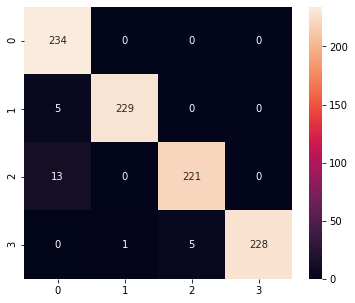

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_clas)
plt.figure(figsize = (6,5))
sns.heatmap(cm,fmt='.4g', annot=True)

In [ ]:
!pip install scikit-plot

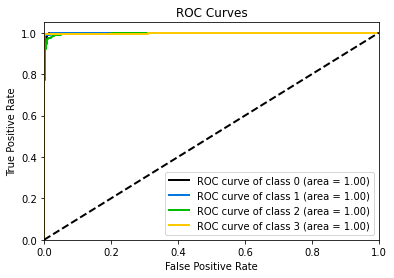

In [ ]:
import scikitplot as skplt
import matplotlib.pyplot as plt

skplt.metrics.plot_roc(y_test,
                       y_pred,
                       plot_micro=False,
                       plot_macro=False)
plt.show()

In [ ]:
occluding_size = 70
occluding_stride =  10

image = cv2.imread('/content/drive/MyDrive/veriseti/train/DME/DME-1169820-1.jpeg')
im = cv2.resize(image, (160, 160))
im2 = im.astype(np.float32)
im3 = np.expand_dims(im2, axis=0)
out = model.predict(im3)
out = out[0]
m = max(out)
index_object = [i for i, j in enumerate(out) if j == m]
height, width, _ = image.shape
output_height = int((height-occluding_size) / occluding_stride + 1)
output_width = int((width-occluding_size) / occluding_stride + 1)
heatmap = np.zeros((output_height, output_width))
heatmap.shape

(43, 45)

In [ ]:
import copy
from tqdm.notebook import tqdm

a = []

for h in tqdm(range(output_height)):
        #print('scanning position (%s)'%(h))
        for w in range(output_width):
            h_start = h * occluding_stride
            w_start = w * occluding_stride
            h_end = min(height, h_start + occluding_size)
            w_end = min(width, w_start + occluding_size)
            input_image = copy.copy(image)
            input_image[h_start:h_end, w_start:w_end,:] = 0
            a.append(input_image)
            im = cv2.resize(input_image, (160, 160))
            im = im.astype(np.float32)
            im = np.expand_dims(im, axis=0)
            out = model.predict(im)
            out = out[0]
            prob = (out[index_object]) 
            heatmap[h,w] = prob

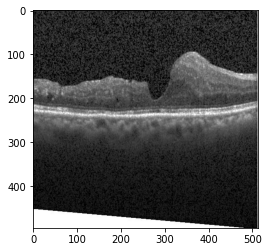

In [ ]:
import copy
input_image2 = copy.copy(image)
plt.imshow(input_image2)

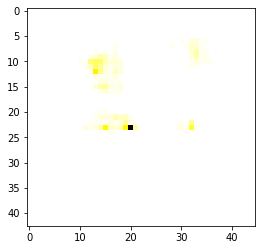

In [ ]:
plt.imshow(heatmap,cmap='hot')

In [ ]:
import os
import numpy as np
import pandas as pd 
import random
import cv2
import matplotlib.pyplot as plt

seed = 2019
np.random.seed(seed)
%matplotlib inline
path  = '/content/drive/MyDrive/veriseti/'
train = path + 'train/'
test  = path + 'test/'
path,train,test

from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale = 1./255,
                                   
                                   validation_split=0.3
                                
                                   )



train_gen = datagen.flow_from_directory(
                            directory = train, 
                            target_size = (160, 160), 
                            batch_size = 16, 
                            class_mode = 'categorical', 
                            shuffle=True,
                            subset='training')

test_gen = datagen.flow_from_directory(
                            directory = test, 
                            target_size = (160, 160), 
                            batch_size = 16, 
                            class_mode = 'categorical', 
                            shuffle=False,
                            subset='validation')

Found 3202 images belonging to 4 classes.
Found 184 images belonging to 4 classes.


In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization

inception =InceptionV3(input_shape=(160,160,3), weights='imagenet', include_top=False)

x = Flatten()(inception.output)
x= Dense(500,activation='relu')(x) 
x= BatchNormalization()(x)
x= Dropout(0.5)(x)
prediction = Dense( 4, activation='softmax')(x)
model = Model(inputs=inception.input, outputs=prediction) 


#modelin derlenmesi       
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
model_fit_inc =model.fit(
  train_gen,
  validation_data=test_gen,
  epochs=20,
  steps_per_epoch=len(train_gen) ,
  validation_steps=len(test_gen))    

Epoch 1/20
201/201 [==============================] - 25s 90ms/step - loss: 1.2132 - accuracy: 0.5951 - val_loss: 0.9781 - val_accuracy: 0.7500
Epoch 2/20
201/201 [==============================] - 17s 84ms/step - loss: 0.3766 - accuracy: 0.8846 - val_loss: 1.1779 - val_accuracy: 0.6467
Epoch 3/20
201/201 [==============================] - 17s 84ms/step - loss: 0.3240 - accuracy: 0.9055 - val_loss: 0.1877 - val_accuracy: 0.9620
Epoch 4/20
201/201 [==============================] - 17s 85ms/step - loss: 0.2042 - accuracy: 0.9439 - val_loss: 0.1021 - val_accuracy: 0.9565
Epoch 5/20
201/201 [==============================] - 17s 84ms/step - loss: 0.1876 - accuracy: 0.9498 - val_loss: 0.1664 - val_accuracy: 0.9457
Epoch 6/20
201/201 [==============================] - 17s 85ms/step - loss: 0.3054 - accuracy: 0.9050 - val_loss: 0.1445 - val_accuracy: 0.9728
Epoch 7/20
201/201 [==============================] - 17s 85ms/step - loss: 0.1881 - accuracy: 0.9491 - val_loss: 0.0520 - val_accuracy:

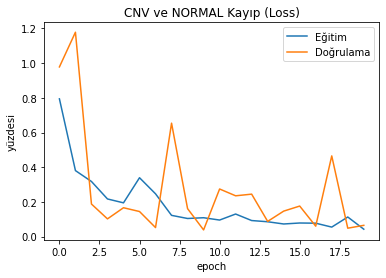

In [ ]:
history1=model_fit_inc
plt.figure()
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.legend(['Eğitim','Doğrulama'])
plt.title('CNV ve NORMAL Kayıp (Loss)')
plt.xlabel('epoch')
plt.ylabel('yüzdesi')
plt.savefig('/content/drive/MyDrive/yapay_zeka_calisma/normal_kayip_inceptionv3.png')

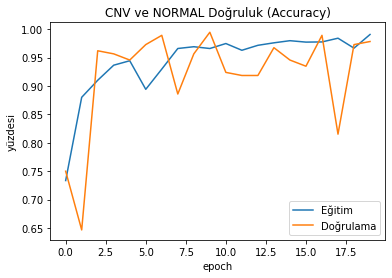

In [ ]:
plt.figure()
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.legend(['Eğitim','Doğrulama'])
plt.title('CNV ve NORMAL Doğruluk (Accuracy)')
plt.savefig('/content/drive/MyDrive/yapay_zeka_calisma/normal_basari_inception.png')
plt.xlabel('epoch')
plt.ylabel('yüzdesi')
plt.show()

In [ ]:
dosya=os.listdir(train)
from sklearn.metrics import confusion_matrix
import seaborn as sns
import glob
test_data = []
test_labels = []

for name in dosya:
    for img in os.listdir(test + name + '/'):
        img = plt.imread(test + name + '/' + img)
        img = cv2.resize(img, (160, 160))
        img = np.dstack([img, img, img])
        img = img.astype('float32')
        
        if   name =='CNV':
            label = 0
        elif name =='NORMAL':
            label = 1
        if   name =='DME':
            label = 2
        elif name =='DRUSEN':
            label = 3
            
            
        test_data.append(img)
        test_labels.append(label)

Y_pred = model.predict_generator(test_gen)
y_pred = np.argmax(Y_pred, axis=1)
        
       
cm = confusion_matrix(test_gen.classes, y_pred)
        


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [ ]:


cm = confusion_matrix(test_gen.classes,y_pred)
cm2=pd.DataFrame(cm, columns=['CNV','NORMAL','DME','DRUSEN'],index=['CNV','NORMAL','DME','DRUSEN'])
cm2

,CNV,NORMAL,DME,DRUSEN
CNV,45,1,0,0
NORMAL,2,44,0,0
DME,0,0,46,0
DRUSEN,0,0,1,45


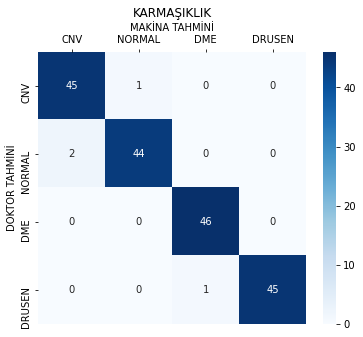

In [ ]:
cm = confusion_matrix(test_gen.classes, y_pred)

plt.figure(figsize = (6,5))

plt.title('KARMAŞIKLIK')
hm=sns.heatmap(cm2, annot=True, fmt='n',cmap='Blues')
hm.tick_params(labeltop=True, labelbottom=False, top=True, bottom= False)
hm.set_xlabel('MAKİNA TAHMİNİ')
hm.xaxis.set_label_position('top')
hm.set_ylabel('DOKTOR TAHMİNİ')
plt.savefig('/content/drive/MyDrive/yapay_zeka_calisma/karmasiklik_inception.png')
plt.show()